In [1]:
from sbibm.algorithms import snle
from sbibm_unle_extra.tasks import get_task
from sbibm_unle_extra.sbibm_eval import snle

/nfs/nhome/live/pierreg/.local/mambaforge/envs/unle-gpu/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/nfs/nhome/live/pierreg/.local/mambaforge/envs/unle-gpu/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [206]:
from smnle.sbibm_smnle import smnle as run

ret = run(
    model="MultiModalLikelihoodTask",
    n_samples_training=10000,
    n_samples_evaluation=10000,
    num_observation=1,
    num_posterior_samples=0,
    mcmc_num_chains=2,
    mcmc_num_warmup_steps=10,
    mcmc_num_inner_steps=10,
    technique="SSM",
    epochs=2000,
    epochs_before_early_stopping=2000,
    batch_size=10000,
    SM_lr=0.05,
    SM_lr_theta=0.05,
    cuda=True,
    momentum=0.1,
    var_red_sliced=False,
    no_scheduler=True,
    seed=5,
    return_posterior=True,
    scaling_method="StandardScaler",
    use_orig_mcmc_impl=False
)

/nfs/nhome/live/pierreg/.local/mambaforge/envs/unle-gpu/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:29<00:00, 67.65it/s]


In [3]:
# dd
# ret_snle_nsf = snle(task="MultiModalLikelihoodTask", num_samples=0, num_simulations=1000, num_observation=1, num_rounds=1, neural_net="nsf")
ret_snle_maf = snle(task="MultiModalLikelihoodTask", num_samples=0, num_simulations=1000, num_observation=1, num_rounds=1, neural_net="maf")

Reduced training_batch_size to num_simulation_per_round


Neural network successfully converged after 197 epochs.

        -------------------------
        ||||| ROUND 1 STATS |||||:
        -------------------------
        Epochs trained: 197
        Best validation performance: -1.6865
        -------------------------
        


In [20]:
from sbibm_unle_extra.unle import run as run_unle
ret_aunle = run_unle(
    "MultiModalLikelihoodTask",
    (1000,), 1,
    num_smc_steps=5,
    num_mala_steps=3,
    use_warm_start=True,
    learning_rate=0.01,
    max_iter=500,
    weight_decay=0.1,
    random_seed=40,
    num_posterior_samples=1000,
    proposal="prior+noise",
    inference_sampler="smc",
    ebm_model_type="joint_tilted",
    inference_proposal="prior",
)

using a network of width 50 and depth 4
generating data took time:  0:00:00
first step...
....done.
iteration 25/500    : 1.776     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 50/500    : 0.829     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 75/500    : 1.540     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 100/500   : 1.607     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 125/500   : 0.279     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 150/500   : 0.512     unnormalized_train_log_l=0.000   

In [27]:
from sbibm_unle_extra.unle import run as run_unle
ret_sunle = run_unle(
    "MultiModalLikelihoodTask", (1000,), 1,
    num_smc_steps=5,
    num_mala_steps=200,
    use_warm_start=True,
    learning_rate=0.01,
    max_iter=500,
    weight_decay=0.1,
    random_seed=40,
    num_posterior_samples=1000,
    init_proposal="prior",
    proposal="data",
    inference_sampler="exchange_mcmc",
    ebm_model_type="likelihood",
    inference_proposal="prior",
    inference_num_warmup_steps=10,
    exchange_mcmc_inner_sampler_num_steps=10,
)

using a network of width 50 and depth 4
generating data took time:  0:00:00
first step...
Using 1000 particles for EBM approximation
using 1000 particles to estimate log likelihood gradient
....done.
Using 1000 particles for EBM approximation
using 1000 particles to estimate log likelihood gradient
iteration 25/500    : 2.141     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 50/500    : 2.662     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 75/500    : 4.986     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 100/500   : 2.319     unnormalized_train_log_l=0.000      unnormalized_test_log_l=0.000      train_log_l=0.000     test_log_l=0.000     ebm_log_l=0.000     
iteration 125/500   : 1.696     

  0%|          | 0/21000 [00:00<?, ?it/s]

finding good initial position
finding good initial position
finding good initial position
all finite after sampling: True
unle completed in 72.519540309906 seconds


In [30]:
import cloudpickle
# with open('ret_multimodal_snle_maf.pkl', 'wb') as f:
#     cloudpickle.dump(ret_snle_maf, f)
#     
# with open('ret_multimodal_snle_nsf.pkl', 'wb') as f:
#     cloudpickle.dump(ret_snle_nsf, f)
#     
# with open('ret_multimodal_smnle.pkl', 'wb') as f:
#     cloudpickle.dump(ret, f)
#     
with open('ret_multimodal_aunle.pkl', 'wb') as f:
    cloudpickle.dump(ret_aunle, f)
    
with open('ret_multimodal_sunle.pkl', 'wb') as f:
    cloudpickle.dump(ret_sunle, f)

In [1]:
import pickle
with open('ret_multimodal_snle_maf.pkl', 'rb') as f:
    ret_snle_maf = pickle.load(f)
    
with open('ret_multimodal_smnle.pkl', 'rb') as f:
    ret = pickle.load(f)
    
with open('ret_multimodal_aunle.pkl', 'rb') as f:
    ret_aunle = pickle.load(f)
    
with open('ret_multimodal_sunle.pkl', 'rb') as f:
    ret_sunle = pickle.load(f)

# with open('ret_multimodal_snle_nsf.pkl', 'rb') as f:
#     ret_snle_nsf = pickle.load(f)
#     

/nfs/nhome/live/pierreg/.local/mambaforge/envs/unle-gpu/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/nfs/nhome/live/pierreg/.local/mambaforge/envs/unle-gpu/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


#### Normalize SMNLE Posterior

In [2]:
import copy
from density_utils.plotting import normalize_density
def make_brute_force_normalized_likelihood(likelihood):
    new_likelihood = copy.deepcopy(likelihood)
    def new_likelihood_log_prob(theta, x):
        return normalize_density(
            likelihood.set_condition(theta).log_prob,
            # ((x[0] - 5, x[0] + 5), (x[1] - 5, x[1] + 5)),
            ((theta[0] - 5, theta[0] + 5), (theta[1] - 5, theta[1] + 5)),
            50,
            True,
        )(x)
    new_likelihood.likelihood_log_prob = new_likelihood_log_prob
    return new_likelihood

In [3]:
import copy
smnle_posterior_normalized = copy.deepcopy(ret[-1])
new_likelihood = make_brute_force_normalized_likelihood(smnle_posterior_normalized.joint_distribution.conditional.base_dist)
smnle_posterior_normalized.joint_distribution.conditional.base_dist = new_likelihood

#### Normalize SUNLE Posterior

In [7]:
import copy
from density_utils.plotting import normalize_density
from jax import vmap
from jax.nn import logsumexp

def make_brute_force_log_z_net(likelihood):
    new_likelihood = copy.deepcopy(likelihood)
    def brute_force_log_z_net(theta):
        offset = 5
        bounds = ((theta[0] - offset, theta[0] + offset), (theta[1] - offset, theta[1] + offset))
        nbins= 50
        (x_min, x_max), (y_min, y_max) = bounds
        _X, _Y = jnp.meshgrid(
            jnp.linspace(x_min, x_max, nbins),
            jnp.linspace(y_min, y_max, nbins),
            indexing="ij",
        )
        _inputs = jnp.stack((_X, _Y), axis=-1)
        conditioned_log_density_vals = vmap(vmap(likelihood.set_condition(theta).log_prob))(_inputs)
        return logsumexp(conditioned_log_density_vals)
    return brute_force_log_z_net

In [8]:
import copy
sunle_posterior_normalized = copy.deepcopy(ret_sunle.train_results.posterior)
log_z_net = make_brute_force_log_z_net(sunle_posterior_normalized.dist.base_dist.joint_distribution.conditional)
new_likelihood = sunle_posterior_normalized.dist.base_dist.joint_distribution.conditional.set_log_z_net(log_z_net)
sunle_posterior_normalized.dist.base_dist.joint_distribution.conditional = new_likelihood

#### Plot Likelihoods/Posteriors

10


/nfs/nhome/live/pierreg/.local/mambaforge/envs/unle-gpu/lib/python3.9/site-packages/sbi/inference/posteriors/likelihood_based_posterior.py:113: UserWarning: The log probability from SNL is only correct up to a normalizing constant.
  warn(


10
10
10
10
10


Text(0.5, 1.1, 'Posterior')

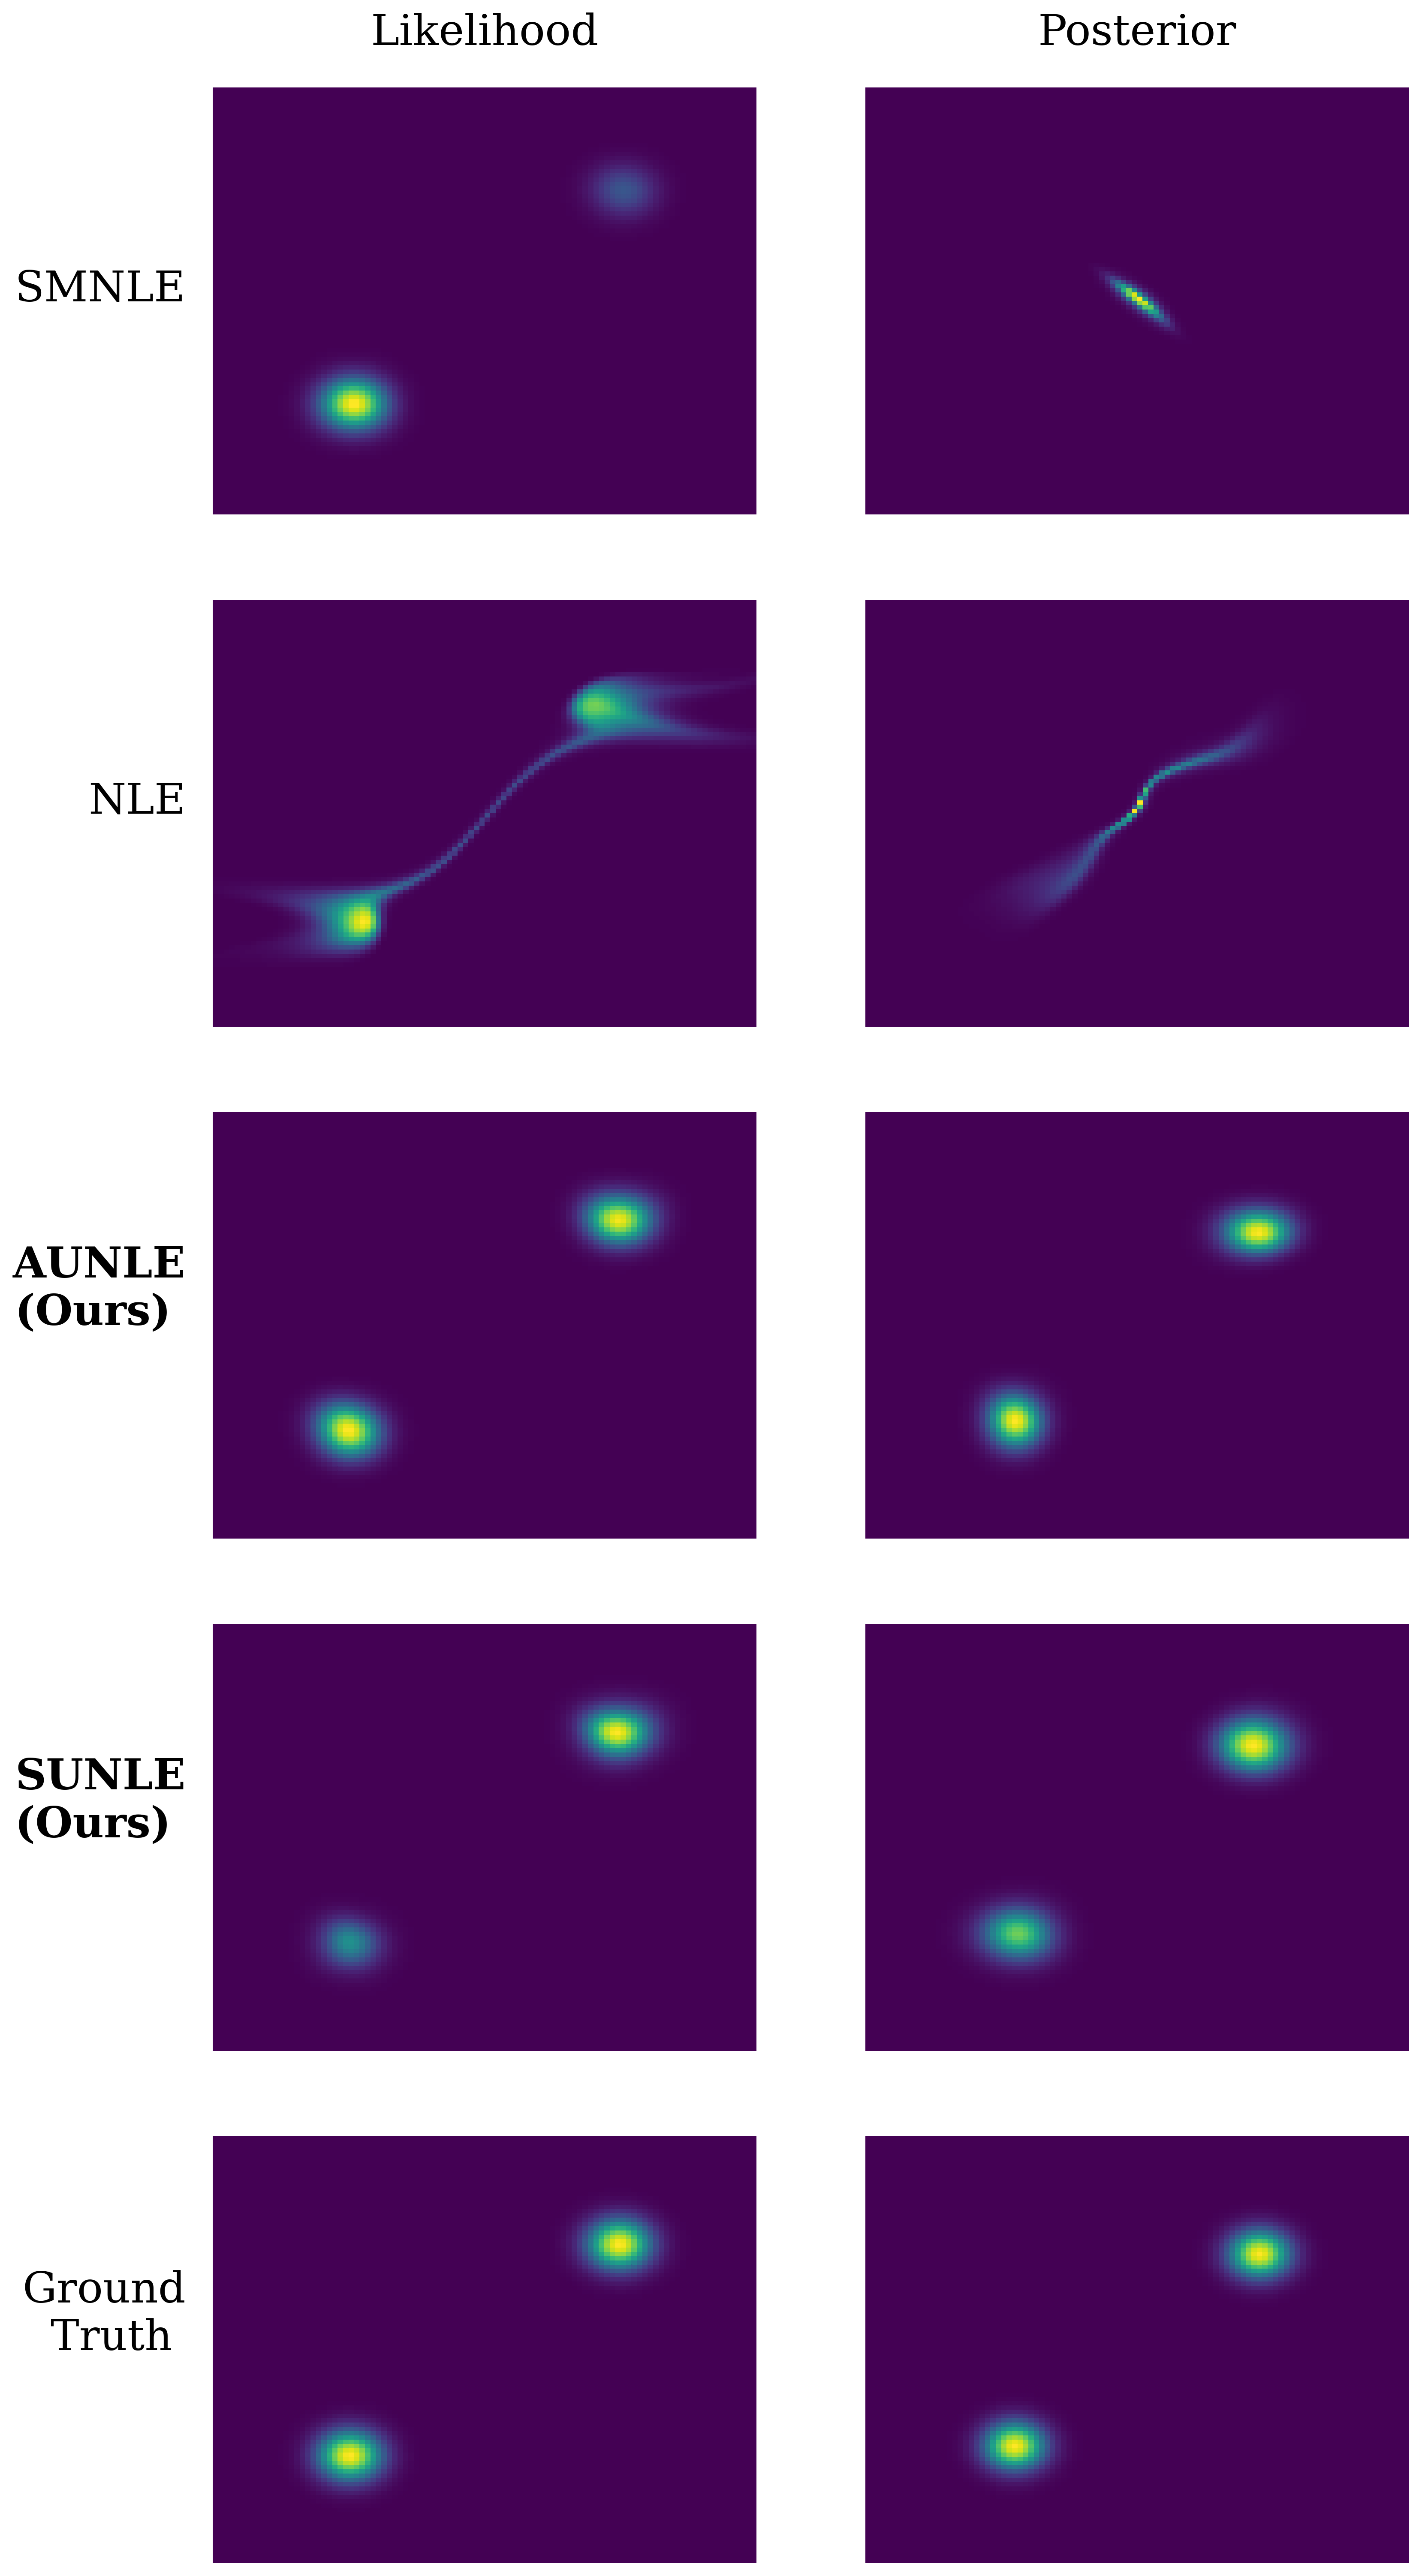

In [29]:
import jax.numpy as jnp
import torch
from density_utils.plotting import plot_densities
from density_utils import plotting
import matplotlib.pyplot as plt
import torch

plt.style.use("paper.mplstyle")
plt.rcParams.update({
    "text.usetex": False,
    # "font.family": "Helvetica"
})

nbins = 100

from sbibm_unle_extra.tasks import get_task, JaxTask
t = get_task("MultiModalLikelihoodTask")

f, axs  = plt.subplots(figsize=(12, 25), ncols=2, nrows=5)


# _ = axs[0, 0].axis('off')

plot_densities(
    {"smnle": lambda x:  smnle_posterior_normalized.joint_distribution.conditional.log_prob_override_conditionned(jnp.zeros((2,)), x)}, bounds=((-4,4), (-4,4)),
    nbins=nbins, log_space=True, axs=axs[0,:1],
)

plot_densities(
    {"smnle": lambda theta:  smnle_posterior_normalized.set_condition(jnp.zeros((2,))).log_prob(theta)}, bounds=((-4,4), (-4,4)), nbins=nbins, log_space=True, axs=axs[0,1:],
    batch_size=10
)


_ = plotting.plot_density_pytorch(
    ((-4 ,4), (-4, 4)),
    lambda x: (ret_snle_maf.train_results.posterior.flow.log_prob(theta=torch.zeros((2,)), x=x)[0]).exp(), nbins=nbins, ax=axs[1, 0]
)

_ = plotting.plot_density_pytorch(((-4 ,4), (-4, 4)), lambda theta: ret_snle_maf.train_results.posterior.flow.log_prob(theta)[0].exp(), nbins=nbins, ax=axs[1, 1])


plot_densities(
     {"aunle": lambda x:  ret_aunle.train_results.posterior.dist.likelihood.log_prob_override_conditionned(jnp.zeros((2,)), x)},
     bounds=((-4, 4), (-4,4)), nbins=nbins, log_space=True, axs=axs[2, :1], # batch_size=10
)


plot_densities(
    {"aunle":  ret_aunle.train_results.posterior.log_prob}, bounds=((-4, 4), (-4,4)), nbins=nbins,
    log_space=True, axs=axs[2, 1:], batch_size=10
)


plot_densities(
    {"sunle":  ret_sunle.train_results.posterior.dist.likelihood.set_condition(jnp.zeros((2,))).log_prob}, bounds=((-4, 4), (-4,4)), nbins=100, log_space=True, axs=axs[3, :1],
    batch_size=10
)

plot_densities(
    {"sunle":  lambda theta: sunle_posterior_normalized.log_prob_override_conditionned(jnp.zeros((2,)), theta)}, bounds=((-4, 4), (-4,4)), nbins=100, log_space=True, axs=axs[3, 1:],
    batch_size=10,
)

plot_densities(
    {"true":  lambda x: t._jax_log_likelihood(jnp.zeros((2,)), x)}, bounds=((-4, 4), (-4,4)), nbins=nbins, log_space=True, axs=axs[4, :1], batch_size=10
)


plot_densities(
    {"true":  lambda theta: JaxTask(t).get_prior_dist().log_prob(theta) +  t._jax_log_likelihood(theta, jnp.zeros((2,)))},
    bounds=((-4, 4), (-4,4)), nbins=nbins, log_space=True, axs=axs[4, 1:], batch_size=10
)


for rax in axs:
    for ax in rax:
        ax.axis('off')
        
        
axs[0, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="SMNLE", transform=axs[0, 0].transAxes)
axs[1, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="NLE", transform=axs[1, 0].transAxes)
axs[2, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="AUNLE\n(Ours) ", transform=axs[2, 0].transAxes, fontweight="bold")
axs[3, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="SUNLE\n(Ours) ", transform=axs[3, 0].transAxes, fontweight="bold")
axs[4, 0].text(y=0.5, x=-0.05, size=24, horizontalalignment='right', s="Ground\nTruth ", transform=axs[4, 0].transAxes)

axs[0, 0].text(y=1.1, x=0.5, size=24, horizontalalignment='center', s="Likelihood", transform=axs[0, 0].transAxes)
axs[0, 1].text(y=1.1, x=0.5, size=24, horizontalalignment='center', s="Posterior", transform=axs[0, 1].transAxes)

# 
# f.tight_layout()
# f.savefig('multimodal_posterior_fig_icml.png', dpi=300)